# Retroalimentacion Primer Parcial (2018-I)
<hr />

In [7]:
# Primero importamos los metodos que vse requieren para la solucion 
# de este examen. Todos los metodos de solucion numérica de ecuaciones
# vistos en clase, estan contenidos en el archivo "methods.py"
from methods import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### PRIMER PUNTO: 
##### Considerando la siguiente funcion:
\begin{equation}
f(x) = e^{-x-0.2}-x
\end{equation}
-  Se sabe que el cero de dicha función debe ser aproximadamente $\sim 0.497719$. Construya una lista que contenga las primeras 15 aproximaciones sucesivas de este cero, obtenidas por medio del método de bisección (tomando como intervalo inicial $[0,2]$). Denomine a esta lista como $list1$.

-  Construya otra lista similar a la del literal anterior pero ahora usando el método de la posición falsa. Denomine a esta lista como $list2.

-  Realice un gráfico de $x_n$ vs $n$, donde $x_n$ es la n-ésima iteración del método, comparando ambos métodos. A partir del gráfico concluya cual método converge más ràpido. 

solucion por biseccion =  0.375
solucion por regula-falsi =  0.49805195905640126


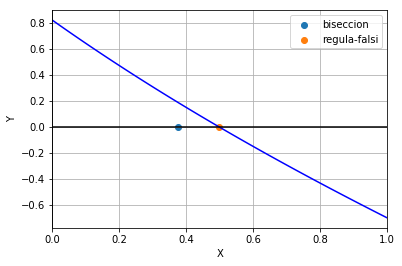

In [2]:
# SOLUCION PRIMER PUNTO
# primero realizamos un grafico cuidadoso del intervalo de interes 
# para poder ver la ubicacion de la solucion y comparemos con las 
# aproximaciones obtenidas por medio de los metodos de biseccion y 
# posicion falsa. 
def f(x):
    return m.exp(-x-0.2)-x

x1 = biseccion(0,1,f,0)
x2 = regula_falsi(0,1,f,0)
print('solucion por biseccion = ', x1)
print('solucion por regula-falsi = ',x2)

xx = np.linspace(0,1,100)
vf = np.vectorize(f)
yy = vf(xx)

plt.plot(xx,yy,'b-')
plt.scatter(x1,0,label='biseccion')
plt.scatter(x2,0,label='regula-falsi')
plt.xlim([0,1])
plt.axhline(y=0,color = 'k',label=None)
plt.axvline(x=0,color = 'k',label=None)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

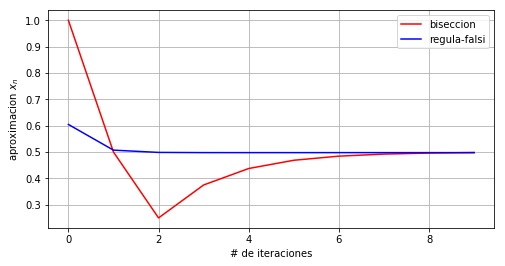

In [4]:
# ahora procedemos a crear las listas solicitadas 
# y graficamos 
list1 = []
list2 = []
a = 0
b = 2
plt.figure(figsize=(8,4))
for i in range(10):
    # note que aqui usamos el metodo "root(args*)"
    # revise los detalles de esta funcion en 
    # el archivo methods.py.
    list1.append(root(a,b,f,i,'biseccion'))
    list2.append(root(a,b,f,i,'regula-falsi'))
plt.plot(list1,'r',label='biseccion')
plt.plot(list2,'b',label='regula-falsi')
plt.xlabel(r'# de iteraciones')
plt.ylabel(r'aproximacion $x_n$')
plt.legend()
plt.grid(True)

##### En este ejercicio podemos concluir que el método de la posición falsa converge mas rápido hacia el cero de la funcion $f(x)$.
<hr />

### SEGUNDO PUNTO: 
##### Considerando la siguiente ecuación:
\begin{equation}
-x^4+6 x^2 + 11 = 0
\end{equation}
-  Tomando como semilla inicial $x_0 = 1$, utilice el método de Newton para calcular las primeras seis aproximaciones de la solucion de la ecuación anterior, ¿Observa algo inusual?

-  En la parte anterior debió observar que el método parece no converger hacia ningun valor particular. Para entender la razón de este comportamiento debemos estudiar los interceptos de las tangentes calculadas con el eje x. Primero construya una función en Python que dibuje la tangente a una función $f(x)$ en el punto $x_n$. Llame a esta funcion "tangente" y construyala de manera que tome como argumentos de entrada la función $f(x)$, el punto $x_n$ (fijo) y la variable $x$ donde se evaluará la función. Observe que la función "tangente" deberá usar la Biblioteca Sympy (recuerde que la ecuación de dicha tangente está dada por):
\begin{equation}
y = f(x_n) + f'(x_n)(x-x_n)
\end{equation}

-  Construya un gráfico de la funcion  $f(x) = -x^4 + 6 x^2 + 11$. Luego, sobre el mismo gráfico (usando la función tangente de la parte anterior) dibuje las rectas tangentes a $f(x)$ en los puntos $x_n = 1$ y $x_n = -1$. Finalmente, a partir del gráfico resultante y de su conocimiento del método de Newton, explique porque el método no converge para este caso particular.  

In [11]:
#SOLUCION SEGUNDO PUNTO 
#Primero calculamos las iteraciones, aqui la funcion f(x) la llamamos g(x). 
import sympy as sp
def g(x):
    return -pow(x,4)+6*pow(x,2)+11
for i in range(1,6):
    print('iteracion # ',i,' = ',newton(g,1,i))

iteracion #  1  =  -1.0
iteracion #  2  =  1.0
iteracion #  3  =  -1.0
iteracion #  4  =  1.0
iteracion #  5  =  -1.0


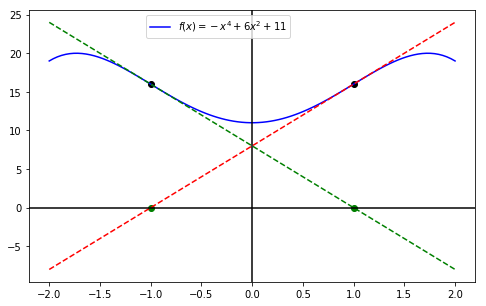

In [12]:
# en la parte anterior observamos que las
# iteraciones oscilan entre 1 y -1. 
# Ahora construimos la funcion tangente
def tangente(f,x0,x):
    var = sp.symbols('var')
    def df(var):
        return sp.diff(f(var),var)
    DerivF = sp.lambdify(var,df(var),'numpy')
    return f(x0)+DerivF(x0)*(x-x0)
# finalmente construimos el grafico requerido
xx = np.linspace(-2,2,100)
vg = np.vectorize(g)
vtang = np.vectorize(tangente)
yy = vg(xx)
yy_tan = vtang(g,1,xx)
yy_tan2  = vtang(g,-1,xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy,'b-',label=r'$f(x) = -x^4+6x^2+11$')
plt.scatter([1,-1],[g(1),g(-1)],c='k')
plt.scatter([1,-1],[0,0],c='g')
plt.plot(xx,yy_tan,'r--')
plt.plot(xx,yy_tan2,'g--')
plt.axhline(y=0,color = 'k',label=None)
plt.axvline(x=0,color = 'k',label=None)
plt.legend(bbox_to_anchor=(0.25,1),loc=2)

##### ¿Que le dice el gráfico anterior?, las pendientes indican que las iteraciones con la semilla inicial de $x_0 = 1$ estan condenadas a repetir un ciclo cerrado siempre entre dos valores y por esta razón el método no converge. 
<hr />